## Etapa 1: Entendimento do Problema
#### Qual pergunta eu quero responder? É algo preditivo?

## Etapa 2: Coleta dos Dados
#### Onde eu vou conseguir os dados para responder essa pergunta? Quais são as fontes?
Kaggle: https://www.kaggle.com/datasets/gregorut/videogamesales

## Etapa 3: Análise Exploratória dos Dados (EDA)
Aqui nós vamos destrinchar os dados, entender tudo o que for importante para responder nossas perguntas


In [1]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização dos dados
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

# Cálculos Estatísticos
from scipy import stats

In [2]:
df = pd.read_csv("vgsales.csv")

#### Paleta de Cores

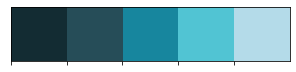

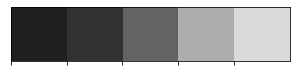

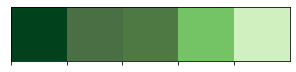

In [3]:
colors_blue = ["#132C33", "#264D58", "#17869E", "#51C4D3", "#B4DBE9"]
colors_dark = ["#1F1F1F", "#313131", "#636363", "#AEAEAE", "#DADADA"]
colors_green = ["#01411C", "#4B6F44", "#4F7942", "#74C365", "#D0F0C0"]

sns.palplot(colors_blue) 
sns.palplot(colors_dark) 
sns.palplot(colors_green)

Primeira inspeção

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
rows, columns = df.shape

In [8]:
print(f'Rows: {rows}')

Rows: 16598


In [9]:
print(f'Columns {columns}')

Columns 11


#### Dicionário de Dados

* Rank - ranking de vendas gerais (int)
* Name - nome dos jogos (object)
* Platform - plataforma de venda dos jogos (ou seja, PC, PS4, etc.) (object)
* Year - ano de lançamento do jogo (float)
* Genre - gênero do jogo (object)
* Publisher - editora do jogo (object)
* NA_Sales - Vendas na América do Norte (em milhões) (float)
* EU_Sales - Vendas na Europa (em milhões) (float)
* JP_Sales - Vendas no Japão (em milhões) (float)
* Other_Sales - Vendas no resto do mundo (em milhões) (float)
* Global_Sales - Vendas mundiais (em milhões) (float)

** Informações Estatísticas

In [10]:
df.describe().round(2)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


In [11]:
df.describe(include="all")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


## Dados Faltantes

In [12]:
df.isnull().sum().sort_values(ascending=False)

Year            271
Publisher        58
Rank              0
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

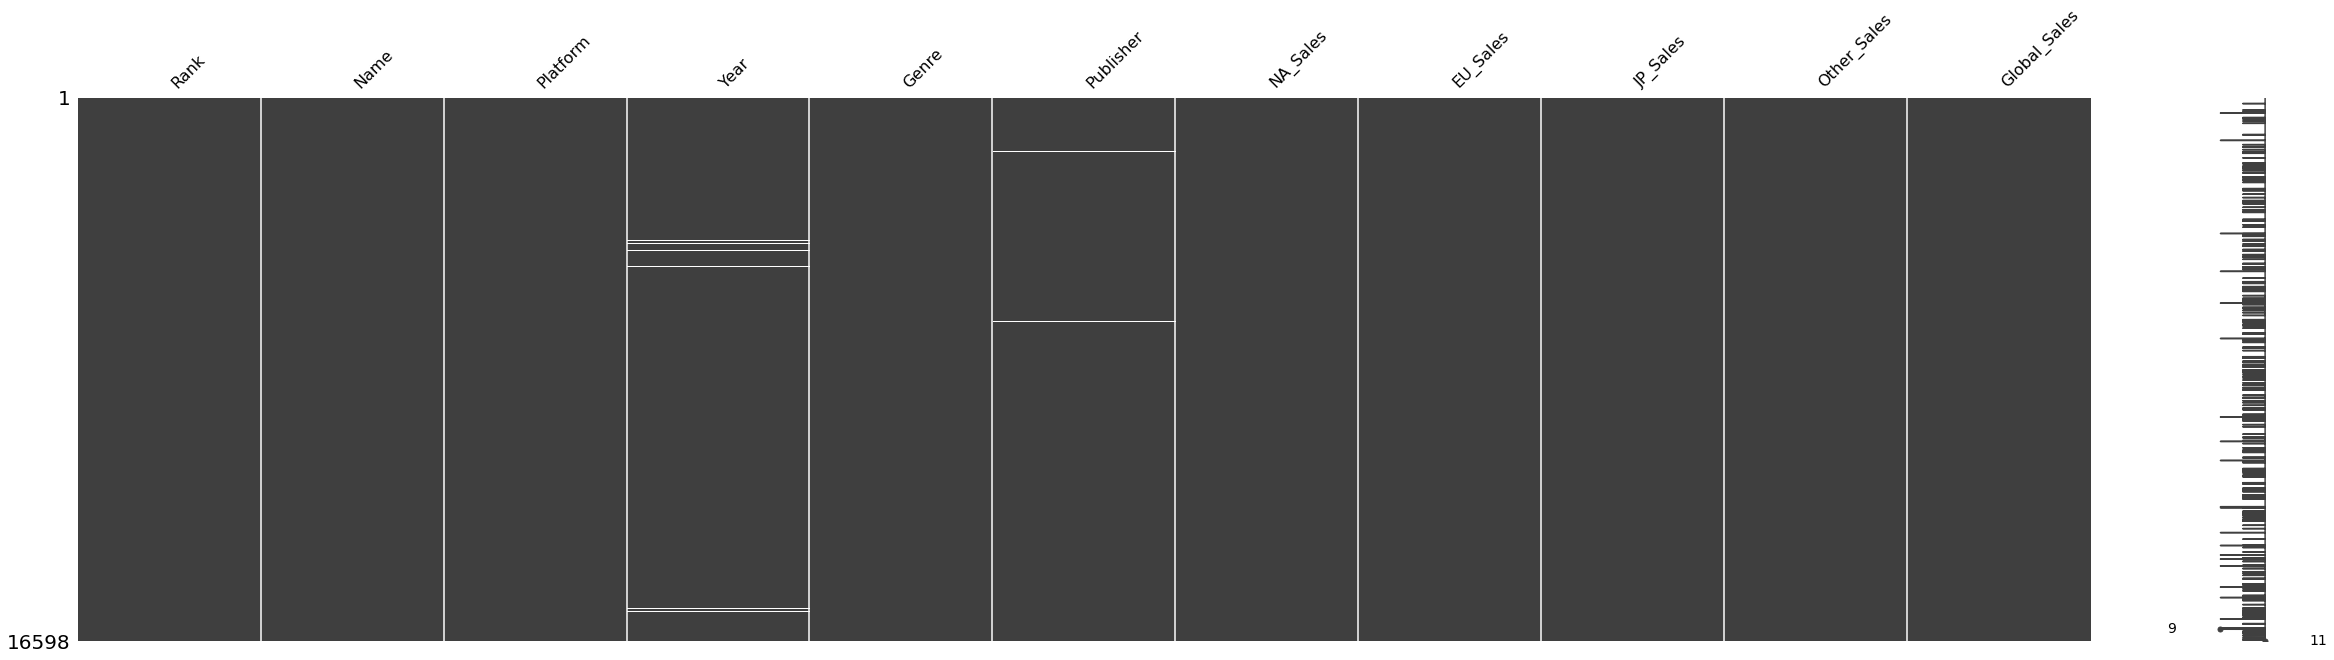

In [13]:
missingno.matrix(df, figsize=(40,10))

In [14]:
percentual_nan = (df.isnull().sum()/rows)*100

In [15]:
percentual_nan.round(2)

Rank            0.00
Name            0.00
Platform        0.00
Year            1.63
Genre           0.00
Publisher       0.35
NA_Sales        0.00
EU_Sales        0.00
JP_Sales        0.00
Other_Sales     0.00
Global_Sales    0.00
dtype: float64

In [16]:
df[df.isnull().any(axis=1)].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


#### Duplicatas

In [17]:
df[df.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


#### Features

Name - nome dos jogos (object)

In [18]:
df['Name'].nunique()

11493

In [19]:
df['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

#### Qual jogo tem maior preço de venda?

In [20]:
top_sales_game = df.head(15)

In [21]:
top_sales_game

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [22]:
top_sales_game = top_sales_game[["Name","Year","Genre", "Global_Sales"]]

In [23]:
top_sales_game.head()

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006.0,Sports,82.74
1,Super Mario Bros.,1985.0,Platform,40.24
2,Mario Kart Wii,2008.0,Racing,35.82
3,Wii Sports Resort,2009.0,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.37


In [24]:
name_game = top_sales_game["Name"]
year_game = top_sales_game["Year"]
y = np.arange(0,20)

In [25]:
top_sales_game['Global_Sales'].values

array([82.74, 40.24, 35.82, 33.  , 31.37, 30.26, 30.01, 29.02, 28.62,
       28.31, 24.76, 23.42, 23.1 , 22.72, 22.  ])

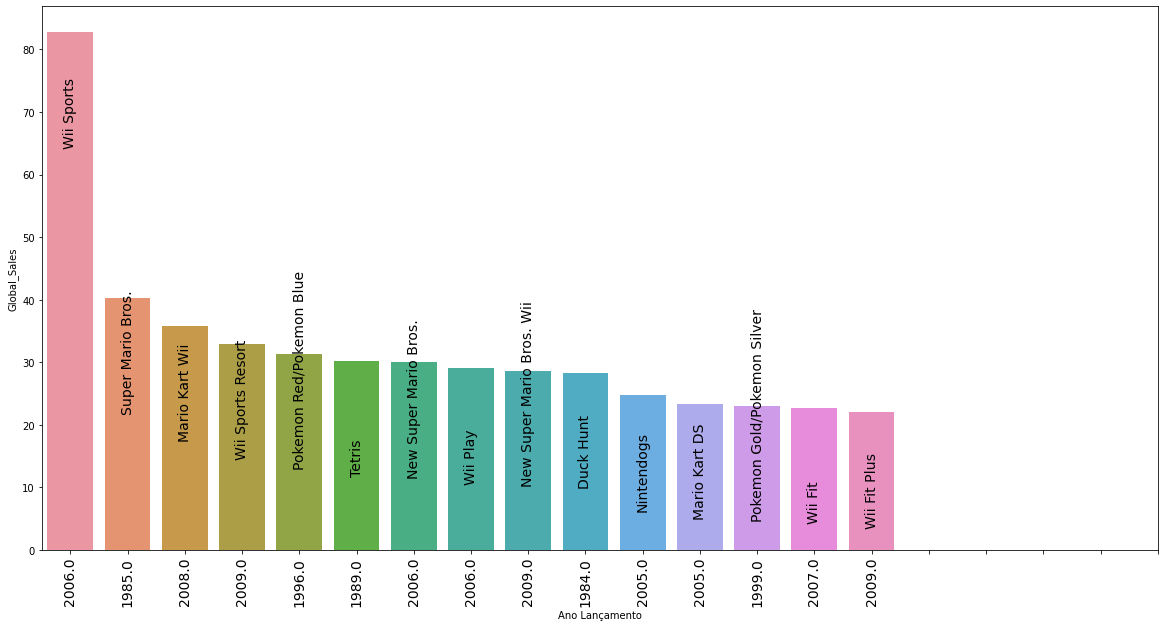

In [26]:
plt.figure(figsize=(20,10))
genre_graph_bar = sns.barplot(x="Name", y="Global_Sales", data=top_sales_game)
index = 0
for i in top_sales_game['Global_Sales'].values:
  genre_graph_bar.text(index, i-18, name_game[index], color='#000', size=14, rotation=90, ha="center")
  index +=1

plt.xticks(y, top_sales_game['Year'], fontsize=14, rotation=90)
plt.xlabel('Ano Lançamento')
plt.show()

Platform - plataforma de venda dos jogos (ou seja, PC, PS4, etc.) (object)

In [27]:
df['Platform'].nunique()

31

In [28]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [29]:
df['Platform'].value_counts(ascending=False)

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

#### Qual plataforma tem maior preço de venda?

In [30]:
df_platform = df.groupby(by=['Platform'])['Global_Sales'].sum()

In [31]:
df_platform.head()

Platform
2600     97.08
3DO       0.10
3DS     247.46
DC       15.97
DS      822.49
Name: Global_Sales, dtype: float64

In [32]:
df_platform = df_platform.reset_index()

In [33]:
df_platform = df_platform.sort_values(by=["Global_Sales"], ascending=False)

In [34]:
df_platform.head()

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

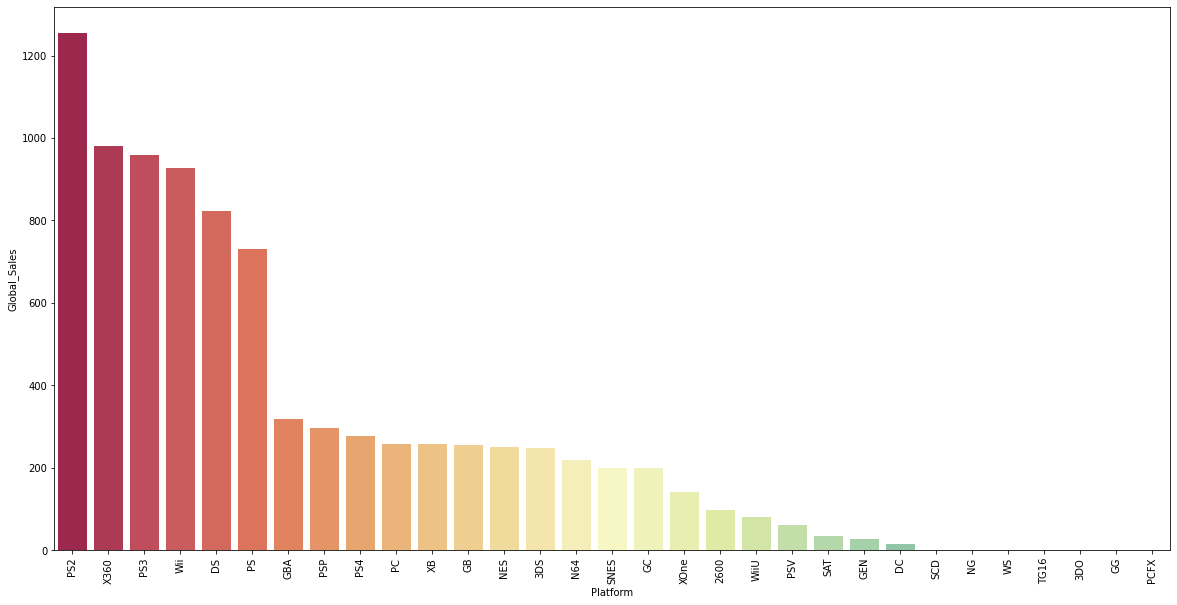

In [35]:
plt.figure(figsize=(20,10))
sns.barplot(x="Platform", y="Global_Sales", data=df_platform, palette='Spectral')
plt.xticks(rotation=90)

Year - ano de lançamento do jogo (float)

In [36]:
df['Year'].nunique()

39

In [37]:
df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [38]:
df['Year'].dtype

dtype('float64')

In [39]:
df['Year'].fillna(-1, inplace=True)

In [40]:
df['Year'] = df['Year'].astype("int64")

In [41]:
df['Year'].dtype

dtype('int64')

In [42]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Jogos lançados por ano

In [43]:
df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False)

Year
 2009    1431
 2008    1428
 2010    1259
 2007    1202
 2011    1139
 2006    1008
 2005     941
 2002     829
 2003     775
 2004     763
 2012     657
 2015     614
 2014     582
 2013     546
 2001     482
 1998     379
 2000     349
 2016     344
 1999     338
 1997     289
-1        271
 1996     263
 1995     219
 1994     121
 1993      60
 1981      46
 1992      43
 1991      41
 1982      36
 1986      21
 1989      17
 1983      17
 1990      16
 1987      16
 1988      15
 1985      14
 1984      14
 1980       9
 2017       3
 2020       1
Name: Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

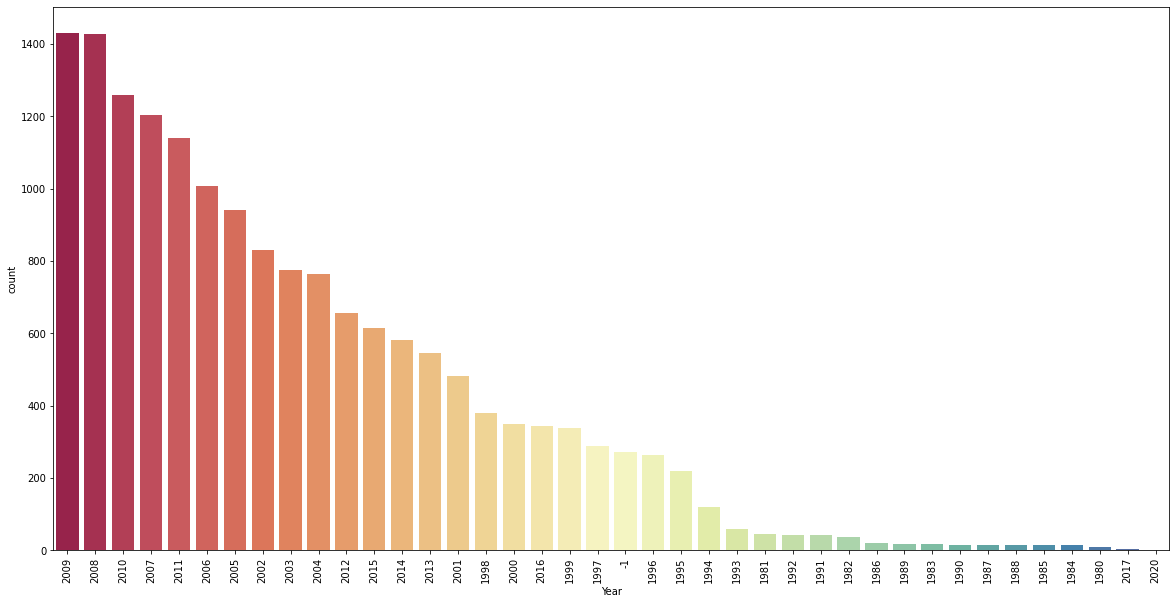

In [44]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=df, order=df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index, palette='Spectral')
plt.xticks(rotation=90)

#### Genre - gênero do jogo (object)

In [45]:
df['Genre'].nunique()

12

In [46]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [47]:
df['Genre'].value_counts(ascending=False)

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

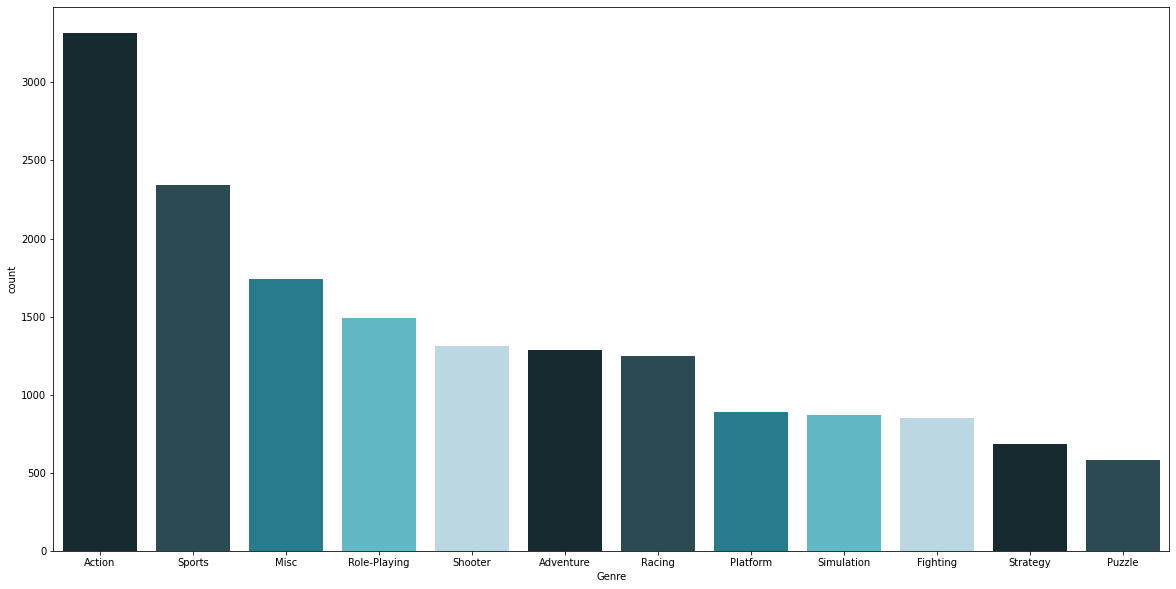

In [48]:
plt.figure(figsize=(20,10))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index, palette=colors_blue)

#### Dentro de cada ano, quais foram os gêneros de jogos mais lançados 

In [49]:
df['Year'].value_counts().iloc[:3].index

Int64Index([2009, 2008, 2010], dtype='int64')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

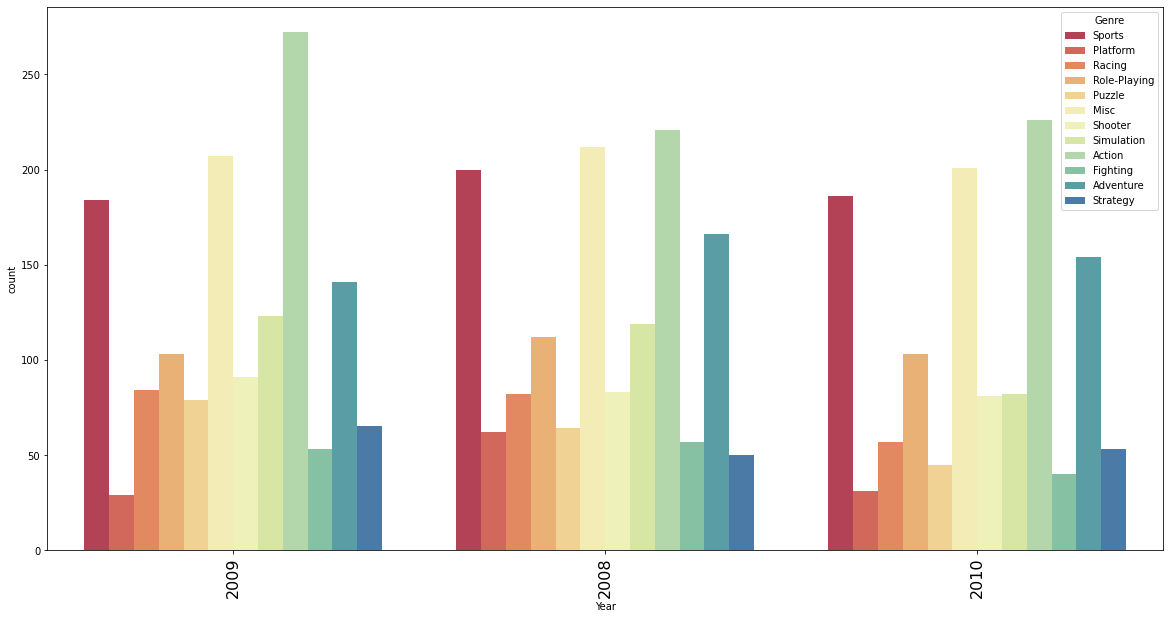

In [50]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=df, hue='Genre', order=df['Year'].value_counts().iloc[:3].index, palette='Spectral')
plt.xticks(size=16, rotation = 90)

#### Qual o gênero de jogo tem o preço mais alto (globalmente)

In [51]:
df_genre = df.groupby(by=["Genre"])["Global_Sales"].sum()

In [52]:
df_genre.head()

Genre
Action       1751.18
Adventure     239.04
Fighting      448.91
Misc          809.96
Platform      831.37
Name: Global_Sales, dtype: float64

In [53]:
df_genre = df_genre.reset_index()

In [54]:
print(df_genre.columns)

Index(['Genre', 'Global_Sales'], dtype='object')


In [55]:
df_genre = df_genre.sort_values(by='Global_Sales', ascending=False)

In [56]:
df_genre.head()

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

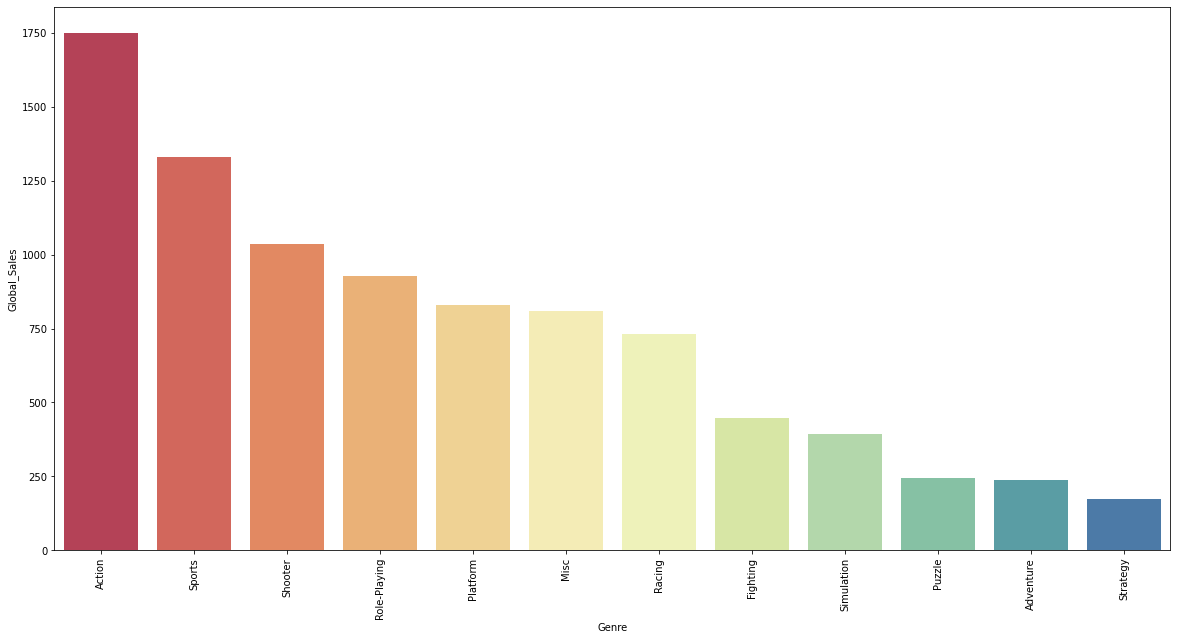

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(x='Genre', y='Global_Sales', data=df_genre, palette='Spectral')
plt.xticks(rotation=90)

Publisher - editora do jogo (object)

In [58]:
df['Publisher'].nunique()

578

In [59]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


#### Quais as principais vendas globais por editor?

In [60]:
sales_publisher = df[['Publisher', 'Global_Sales']]

In [61]:
sales_publisher.head()

,Publisher,Global_Sales
0,Nintendo,82.74
1,Nintendo,40.24
2,Nintendo,35.82
3,Nintendo,33.00
4,Nintendo,31.37


In [62]:
sales_publisher = sales_publisher.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)

In [63]:
sales_publisher.head(5)

Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
Name: Global_Sales, dtype: float64

In [64]:
sales_publisher = pd.DataFrame(sales_publisher).reset_index()

In [65]:
sales_publisher.head()

,Publisher,Global_Sales
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

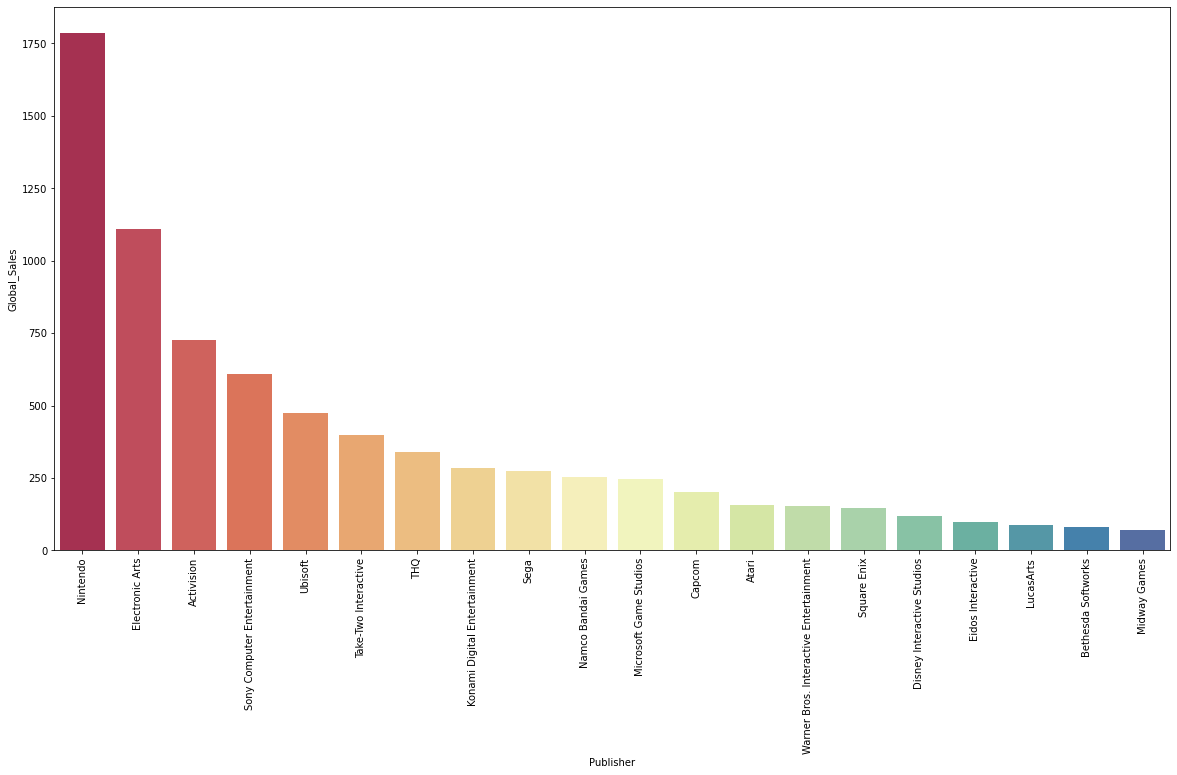

In [66]:
plt.figure(figsize=(20,10))
sns.barplot(x="Publisher", y="Global_Sales", data=sales_publisher, palette="Spectral")
plt.xticks(rotation=90)

NA_Sales - Vendas na América do Norte (em milhões) (float)

In [67]:
df['NA_Sales'].sum().round(2)

4392.95

In [68]:
df['NA_Sales'].describe().round(2)

count    16598.00
mean         0.26
std          0.82
min          0.00
25%          0.00
50%          0.08
75%          0.24
max         41.49
Name: NA_Sales, dtype: float64

In [69]:
df['NA_Sales'].sort_values(ascending=False)

0        41.49
1        29.08
9        26.93
5        23.20
2        15.85
         ...  
8808      0.00
8799      0.00
8795      0.00
13576     0.00
5816      0.00
Name: NA_Sales, Length: 16598, dtype: float64

In [70]:
df[df['NA_Sales'] == 0.00]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
214,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.0,0.00,4.87,0.00,4.87
338,339,Friend Collection,DS,2009,Misc,Nintendo,0.0,0.00,3.67,0.00,3.67
383,384,Monster Hunter 4,3DS,2013,Role-Playing,Capcom,0.0,0.00,3.44,0.00,3.44
402,403,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,Nintendo,0.0,0.99,2.32,0.02,3.33
426,427,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,Enix Corporation,0.0,0.00,3.19,0.00,3.19
...,...,...,...,...,...,...,...,...,...,...,...
16587,16590,Mezase!! Tsuri Master DS,DS,2009,Sports,Hudson Soft,0.0,0.00,0.01,0.00,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.0,0.00,0.01,0.00,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.0,0.00,0.01,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.0,0.00,0.00,0.00,0.01


In [71]:
df[df['NA_Sales'] == 41.49]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


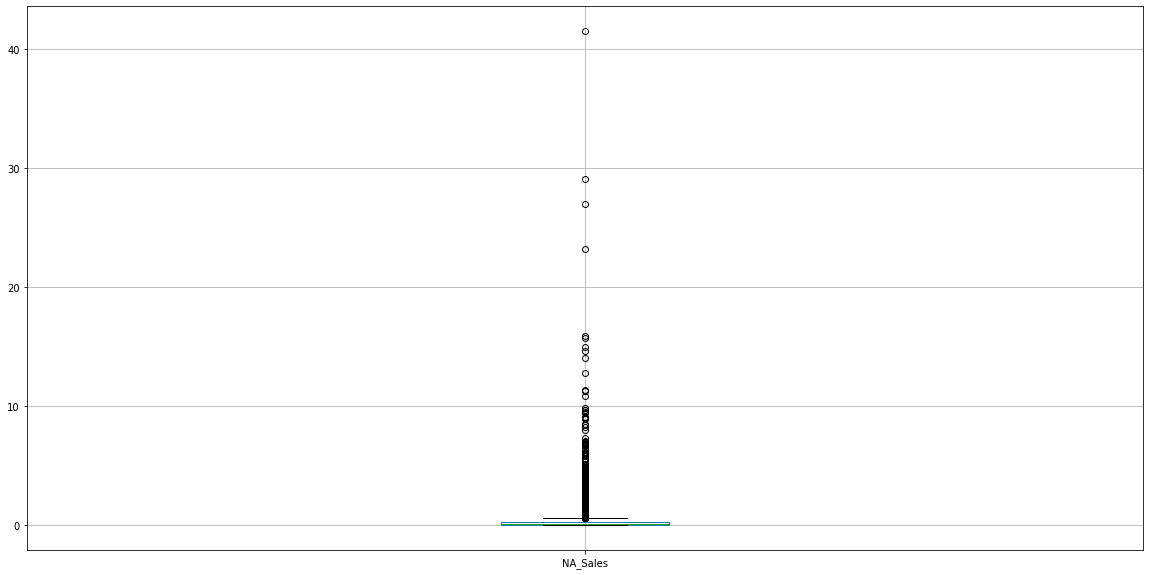

In [72]:
plt.figure(figsize=(20, 10))
df.boxplot('NA_Sales')
plt.show()

In [73]:
df_nasales_year = df.groupby(by='Year')['NA_Sales'].sum()
df_nasales_year = df_nasales_year.reset_index() 

In [74]:
df_nasales_year.head()

,Year,NA_Sales
0,-1,59.52
1,1980,10.59
2,1981,33.40
3,1982,26.92
4,1983,7.76


In [75]:
df_nasales_year.tail()

,Year,NA_Sales
35,2014,131.97
36,2015,102.82
37,2016,22.66
38,2017,0.00
39,2020,0.27


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

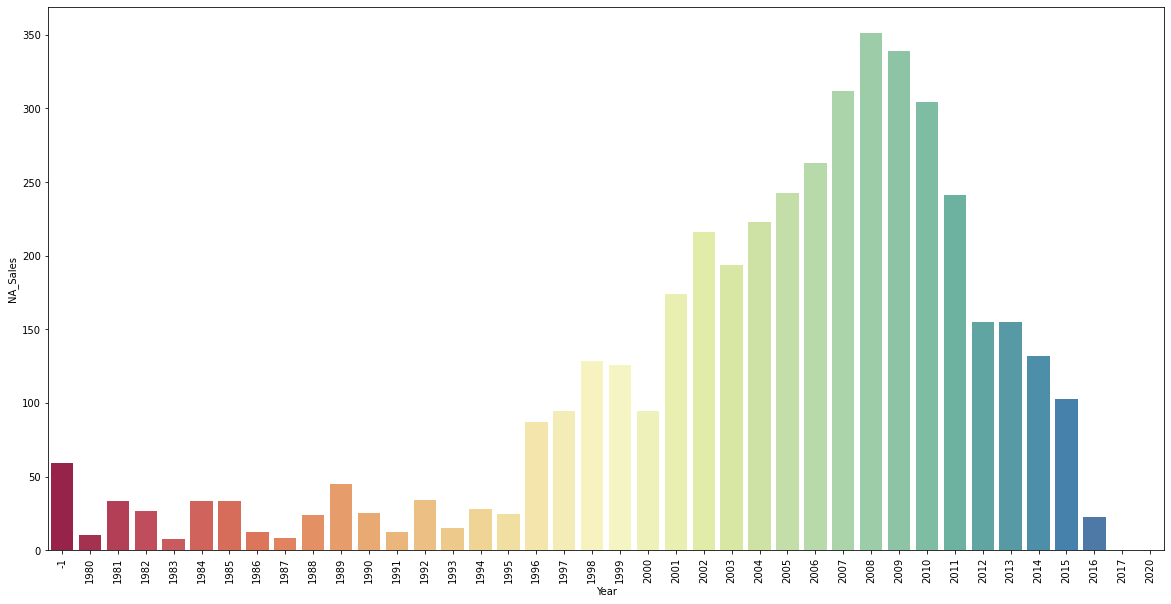

In [76]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Year',y='NA_Sales', data=df_nasales_year, palette="Spectral")
plt.xticks(rotation=90)

#### EU_Sales - Vendas na Europa (em milhões) (float)

In [77]:
df['EU_Sales'].sum().round(2)

2434.13

In [78]:
df['EU_Sales'].describe().round(2)

count    16598.00
mean         0.15
std          0.51
min          0.00
25%          0.00
50%          0.02
75%          0.11
max         29.02
Name: EU_Sales, dtype: float64

In [79]:
df[df['EU_Sales'] == 0.00]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
147,148,Final Fantasy XII,PS2,2006,Role-Playing,Square Enix,1.88,0.0,2.33,1.74,5.95
214,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.0,4.87,0.00,4.87
265,266,Metal Gear Solid 3: Snake Eater,PS2,2004,Action,Konami Digital Entertainment,1.46,0.0,0.83,1.93,4.23
281,282,Half-Life,PC,1997,Shooter,Vivendi Games,4.03,0.0,0.09,0.00,4.12
312,313,Dragon Warrior III,NES,1988,Role-Playing,Enix Corporation,0.10,0.0,3.77,0.00,3.87
...,...,...,...,...,...,...,...,...,...,...,...
16592,16595,Plushees,DS,2008,Simulation,Destineer,0.01,0.0,0.00,0.00,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.0,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.0,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.0,0.00,0.00,0.01


In [80]:
df[df['EU_Sales'] == 29.02]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


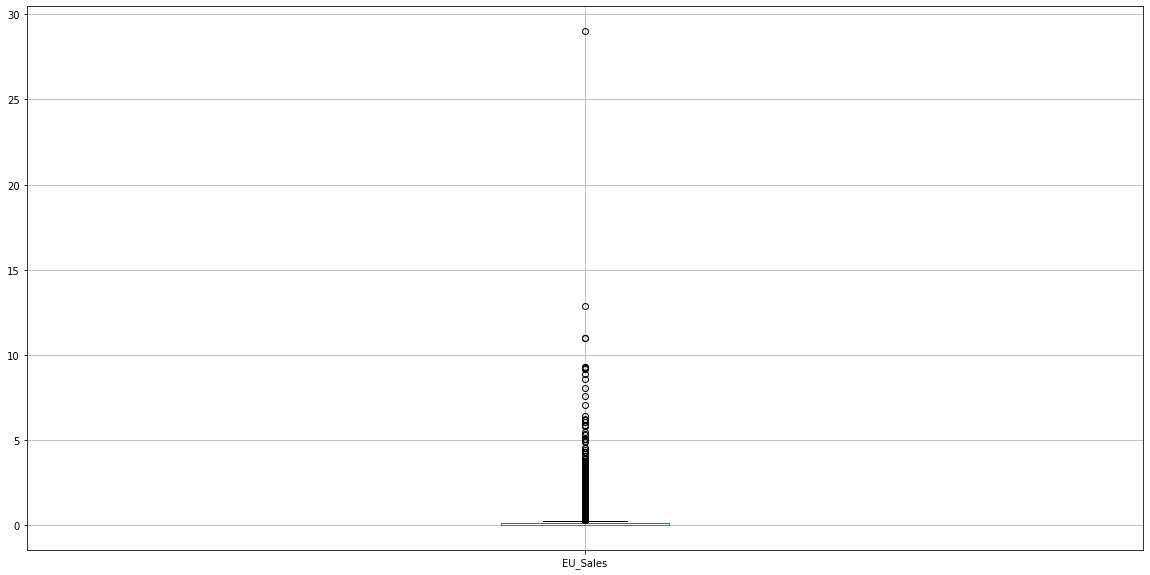

In [81]:
plt.figure(figsize=(20,10))
df.boxplot('EU_Sales')
plt.show()

In [82]:
df_eusales_year = df.groupby(by=["Year"])["EU_Sales"].sum()
df_eusales_year = df_eusales_year.reset_index()

In [83]:
df_eusales_year.head()

,Year,EU_Sales
0,-1,25.01
1,1980,0.67
2,1981,1.96
3,1982,1.65
4,1983,0.80


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

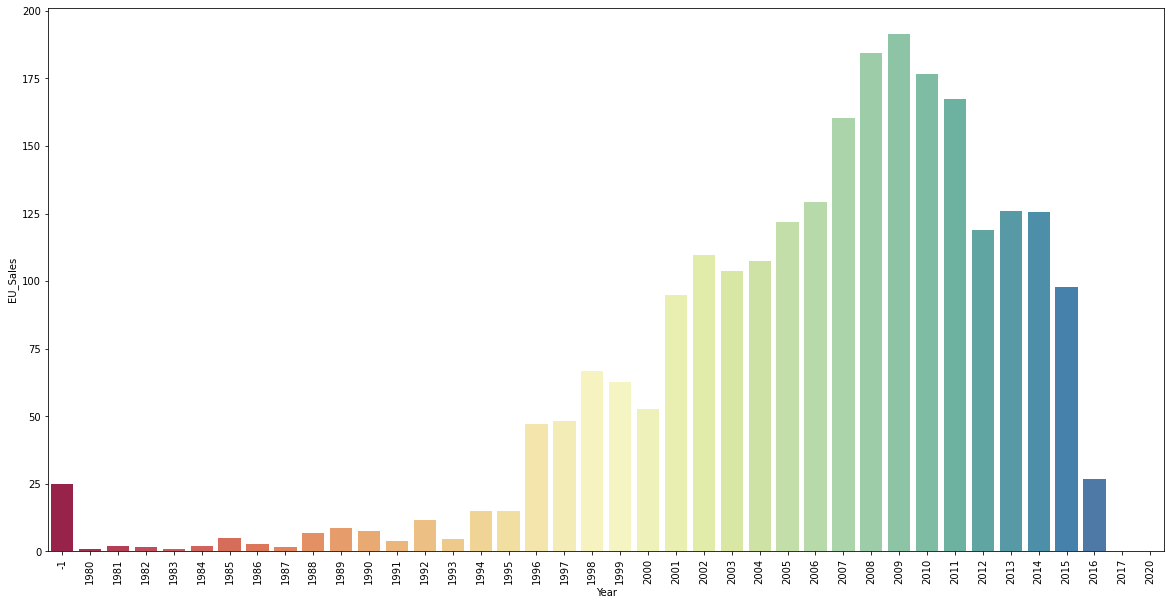

In [84]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Year',y='EU_Sales', data=df_eusales_year, palette="Spectral")
plt.xticks(rotation=90)

#### JP_Sales - Vendas no Japão (em milhões) (float)


In [85]:
df['JP_Sales'].sum().round(2)

1291.02

In [86]:
df['JP_Sales'].describe().round(2)

count    16598.00
mean         0.08
std          0.31
min          0.00
25%          0.00
50%          0.00
75%          0.04
max         10.22
Name: JP_Sales, dtype: float64

In [87]:
df[df['JP_Sales'] == 0.00]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
60,61,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05,3.15,0.0,1.07,10.26
83,84,The Sims 3,PC,2009,Simulation,Electronic Arts,0.98,6.42,0.0,0.71,8.11
89,90,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.0,0.08,7.81
98,99,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.90,0.0,0.69,7.37
102,103,Just Dance,Wii,2009,Misc,Ubisoft,3.51,3.03,0.0,0.73,7.27
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.0,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.0,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.0,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.00,0.01


In [88]:
df[df['JP_Sales'] == 10.22]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


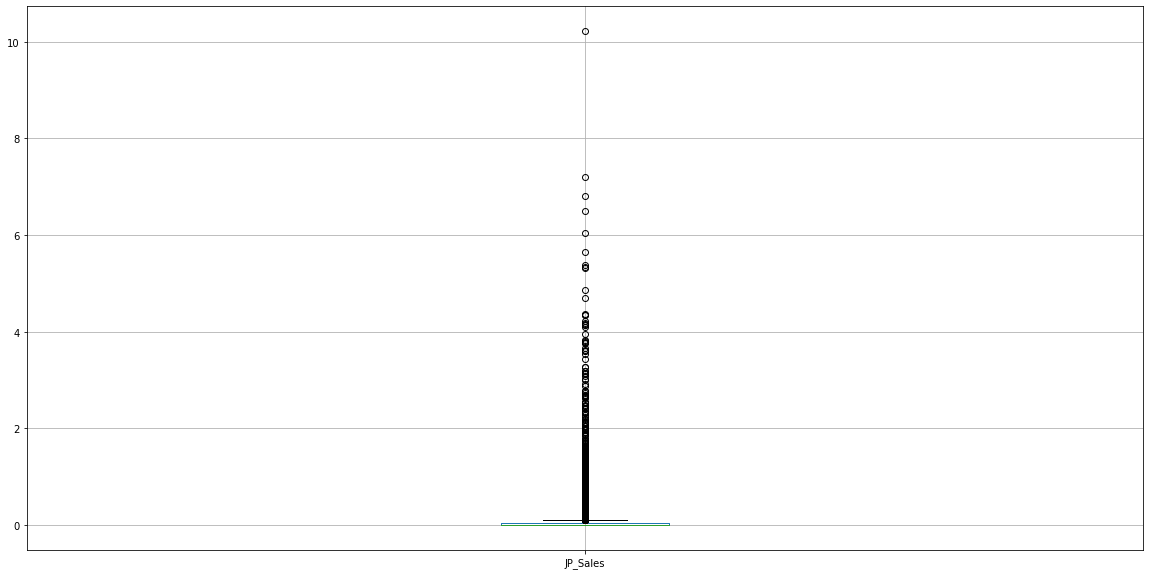

In [89]:
plt.figure(figsize=(20, 10))
df.boxplot('JP_Sales')
plt.show()

In [90]:
df_jpsales_year = df.groupby(by=["Year"])["JP_Sales"].sum()
df_jpsales_year = df_jpsales_year.reset_index()

In [91]:
df_jpsales_year.head()

,Year,JP_Sales
0,-1,6.72
1,1980,0.00
2,1981,0.00
3,1982,0.00
4,1983,8.10


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

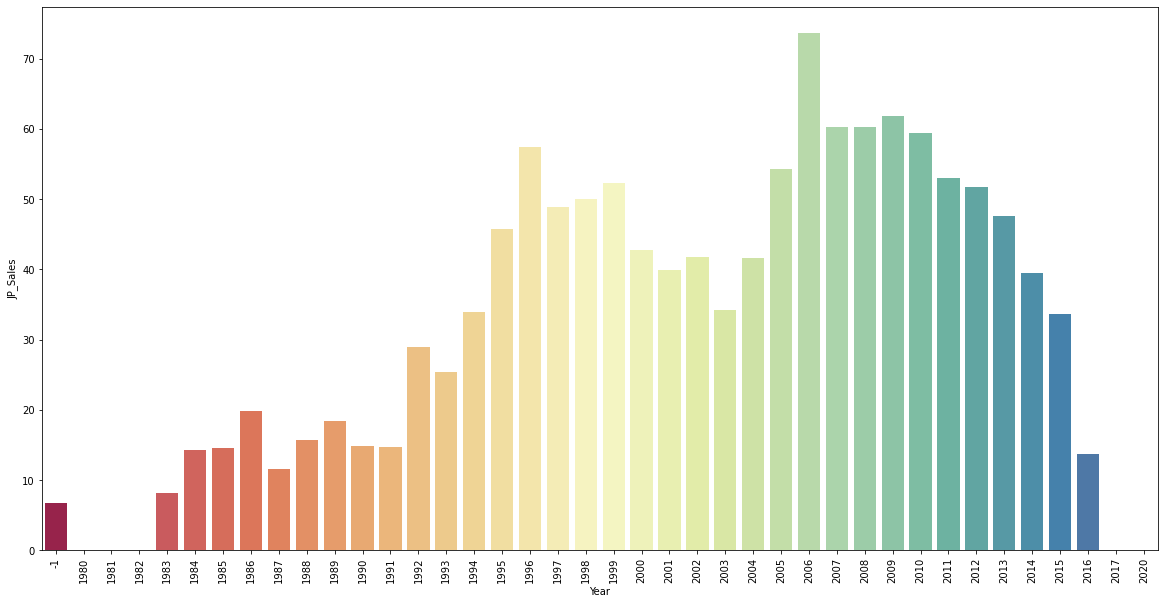

In [92]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Year',y='JP_Sales', data=df_jpsales_year, palette="Spectral")
plt.xticks(rotation=90)

#### Other_Sales - Vendas no resto do mundo (em milhões) (float)

In [93]:
df['Other_Sales'].sum().round(2)

797.75

In [94]:
df['Other_Sales'].describe().round(2)

count    16598.00
mean         0.05
std          0.19
min          0.00
25%          0.00
50%          0.01
75%          0.04
max         10.57
Name: Other_Sales, dtype: float64

In [95]:
df['Other_Sales'].sort_values(ascending=False)

17       10.57
0         8.46
47        7.53
16        4.14
2         3.31
         ...  
12050     0.00
12049     0.00
12048     0.00
4414      0.00
16597     0.00
Name: Other_Sales, Length: 16598, dtype: float64

In [96]:
df[df['Other_Sales'] == 10.57]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.4,0.41,10.57,20.81


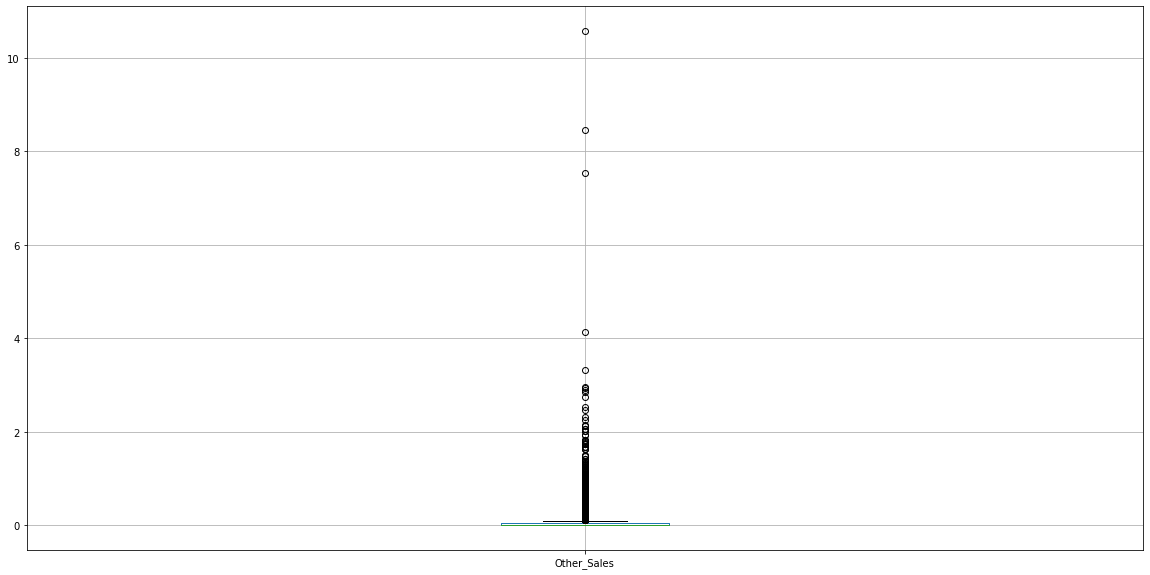

In [97]:
plt.figure(figsize=(20, 10))
df.boxplot('Other_Sales')
plt.show()

In [99]:
df_othersales_year = df.groupby(by=["Year"])["Other_Sales"].sum()
df_othersales_year = df_othersales_year.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

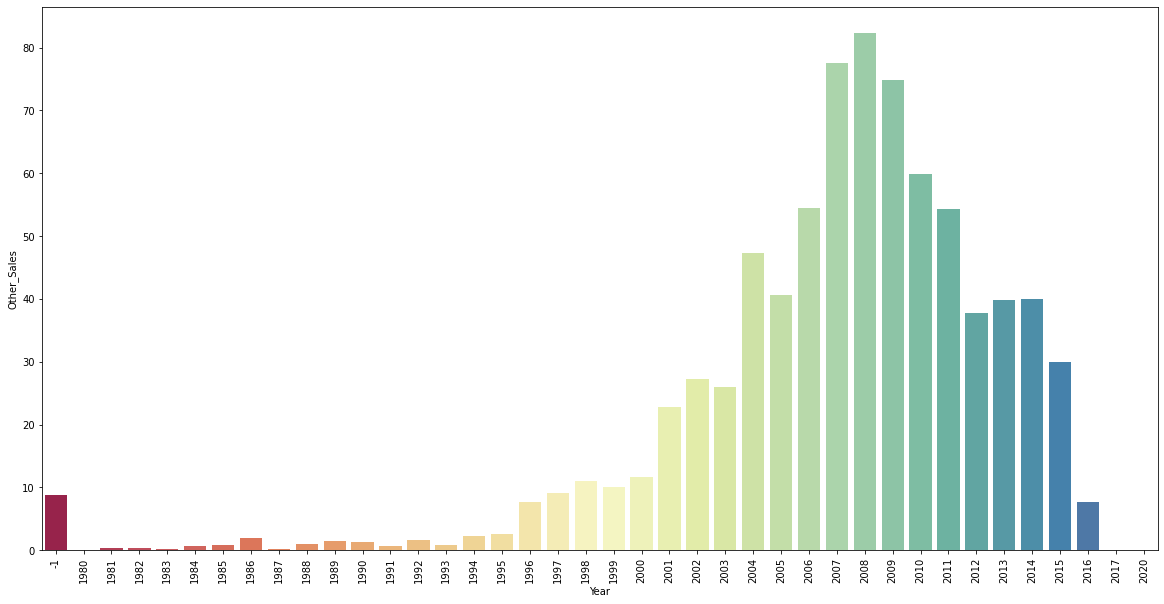

In [100]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Year',y='Other_Sales', data=df_othersales_year, palette="Spectral")
plt.xticks(rotation=90)

#### Global_Sales - Vendas mundiais (em milhões) (float)

In [101]:
df['Global_Sales'].sum().round(2)

8920.44

In [102]:
df['Global_Sales'].describe().round(2)

count    16598.00
mean         0.54
std          1.56
min          0.01
25%          0.06
50%          0.17
75%          0.47
max         82.74
Name: Global_Sales, dtype: float64

In [103]:
df[df['Global_Sales'] == 82.74]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


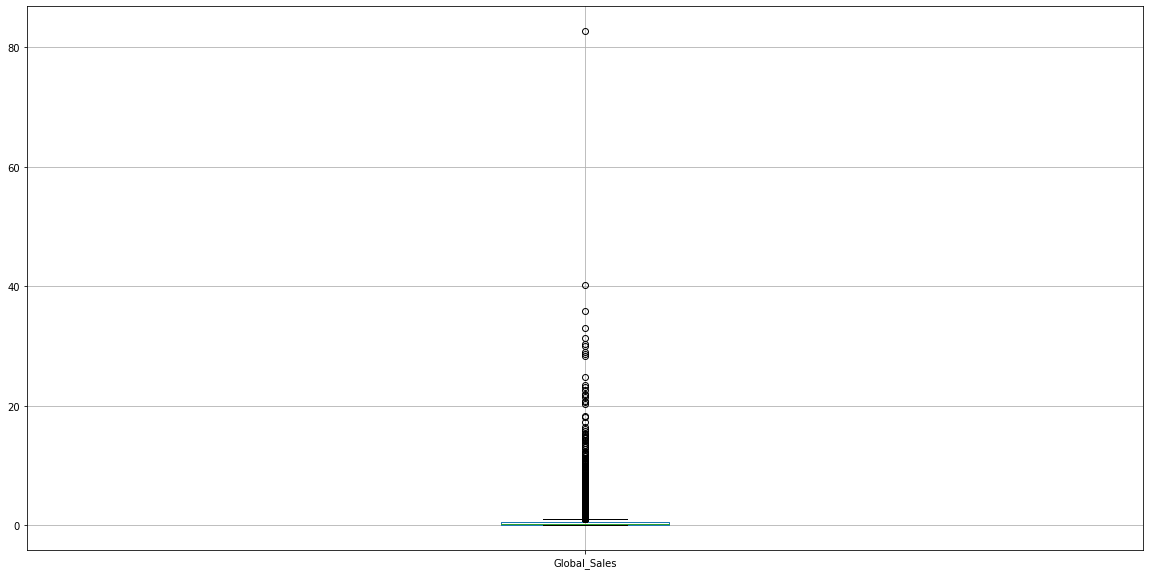

In [104]:
plt.figure(figsize=(20, 10))
df.boxplot('Global_Sales')
plt.show()

In [105]:
df_globalsales_year = df.groupby(by=["Year"])["Global_Sales"].sum()
df_globalsales_year = df_globalsales_year.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

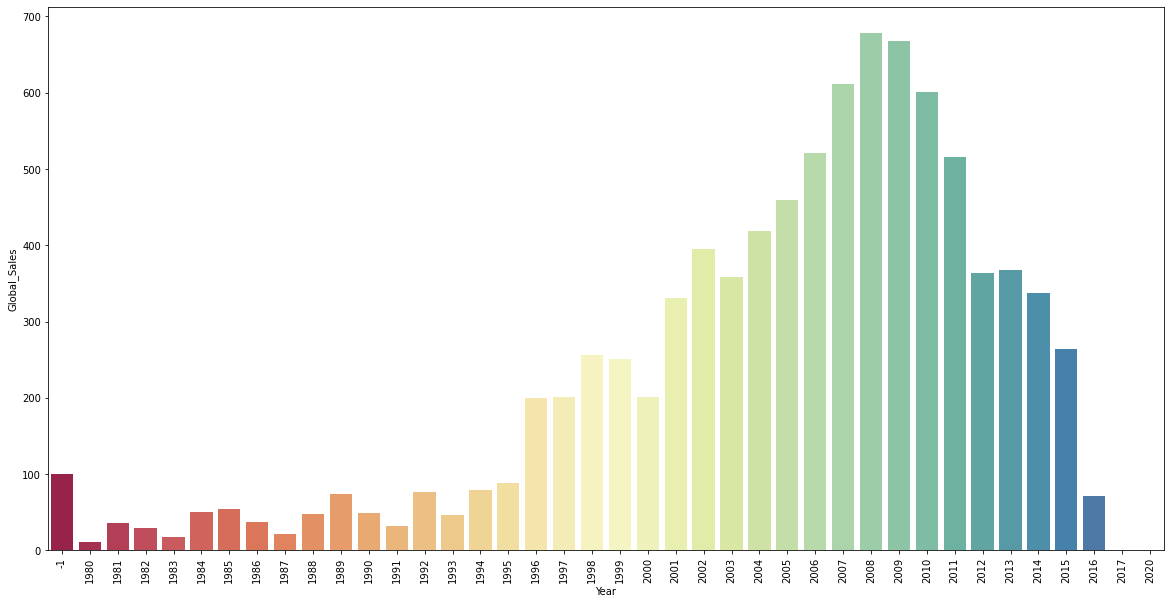

In [106]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Year',y='Global_Sales', data=df_globalsales_year, palette="Spectral")
plt.xticks(rotation=90)

Qual o gênero de jogo mais lançado por ano?

In [107]:
max_year_df = df.groupby(by=['Year', 'Genre']).size().reset_index(name='count')

In [108]:
max_year_df.head()

,Year,Genre,count
0,-1,Action,63
1,-1,Adventure,10
2,-1,Fighting,12
3,-1,Misc,29
4,-1,Platform,10


In [109]:
max_year_idx = max_year_df.groupby(["Year"])["count"].transform(max) == max_year_df["count"]

In [110]:
max_year_idx.head()

0     True
1    False
2    False
3    False
4    False
Name: count, dtype: bool

In [111]:
max_year_genre = max_year_df[max_year_idx].reset_index(drop=True)

In [112]:
max_year_genre

,Year,Genre,count
0,-1,Action,63
1,1980,Misc,4
2,1981,Action,25
3,1982,Action,18
4,1983,Action,7
5,1984,Puzzle,3
6,1984,Racing,3
7,1984,Shooter,3
8,1985,Platform,4
9,1985,Puzzle,4


In [113]:
max_year_genre = max_year_genre.drop_duplicates(subset=["Year", "count"], keep="last").reset_index(drop=True)

In [114]:
max_year_genre.head()

,Year,Genre,count
0,-1,Action,63
1,1980,Misc,4
2,1981,Action,25
3,1982,Action,18
4,1983,Action,7


In [115]:
genre = max_year_genre['Genre'].values

In [116]:
genre

array(['Action', 'Misc', 'Action', 'Action', 'Action', 'Shooter',
       'Puzzle', 'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports',
       'Sports', 'Fighting', 'Platform', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Sports',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Role-Playing', 'Simulation'], dtype=object)

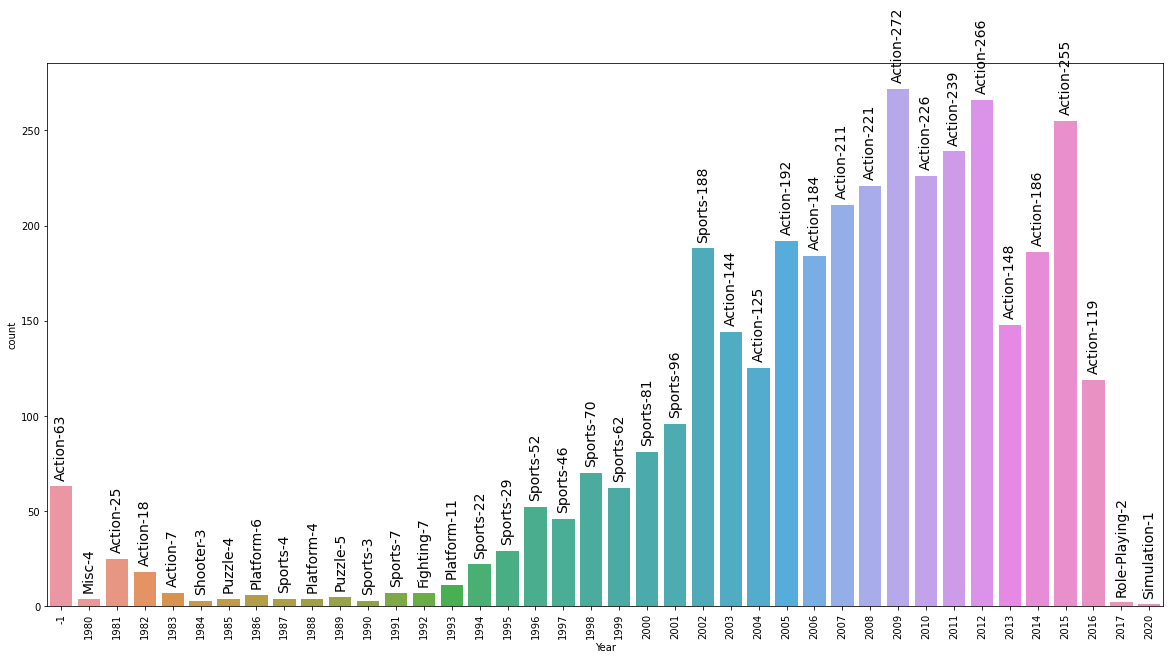

In [117]:
plt.figure(figsize=(20,10))
genre_graph_bar = sns.barplot(x="Year", y="count", data=max_year_genre)
index = 0
for i in max_year_genre['count'].values:
  genre_graph_bar.text(index, i+5, str(genre[index] + '-' + str(i)), color='#000', size=14, rotation=90, ha="center")
  index +=1

plt.xticks(rotation=90)
plt.show()

#### Qual gênero de jogo foi mais vendido por ano

In [118]:
sales_year_idx = df.groupby(by=["Year", "Genre"])["Global_Sales"].sum().reset_index()

In [119]:
sales_year_idx

,Year,Genre,Global_Sales
0,-1,Action,28.30
1,-1,Adventure,4.24
2,-1,Fighting,4.86
3,-1,Misc,12.34
4,-1,Platform,2.22
...,...,...,...
396,2016,Sports,14.60
397,2016,Strategy,0.50
398,2017,Action,0.01
399,2017,Role-Playing,0.04


In [120]:
sales_year = sales_year_idx.groupby(by=["Year"])["Global_Sales"].transform(max) == sales_year_idx['Global_Sales']

In [121]:
sales_year

0       True
1      False
2      False
3      False
4      False
       ...  
396    False
397    False
398    False
399     True
400     True
Name: Global_Sales, Length: 401, dtype: bool

In [122]:
sales_year_max = sales_year_idx[sales_year].reset_index(drop=True).round(2)

In [123]:
sales_year_max

,Year,Genre,Global_Sales
0,-1,Action,28.30
1,1980,Shooter,7.07
2,1981,Action,14.84
3,1982,Puzzle,10.03
4,1983,Platform,6.93
5,1984,Shooter,31.10
6,1985,Platform,43.17
7,1986,Action,13.74
8,1987,Fighting,5.42
9,1988,Platform,27.73


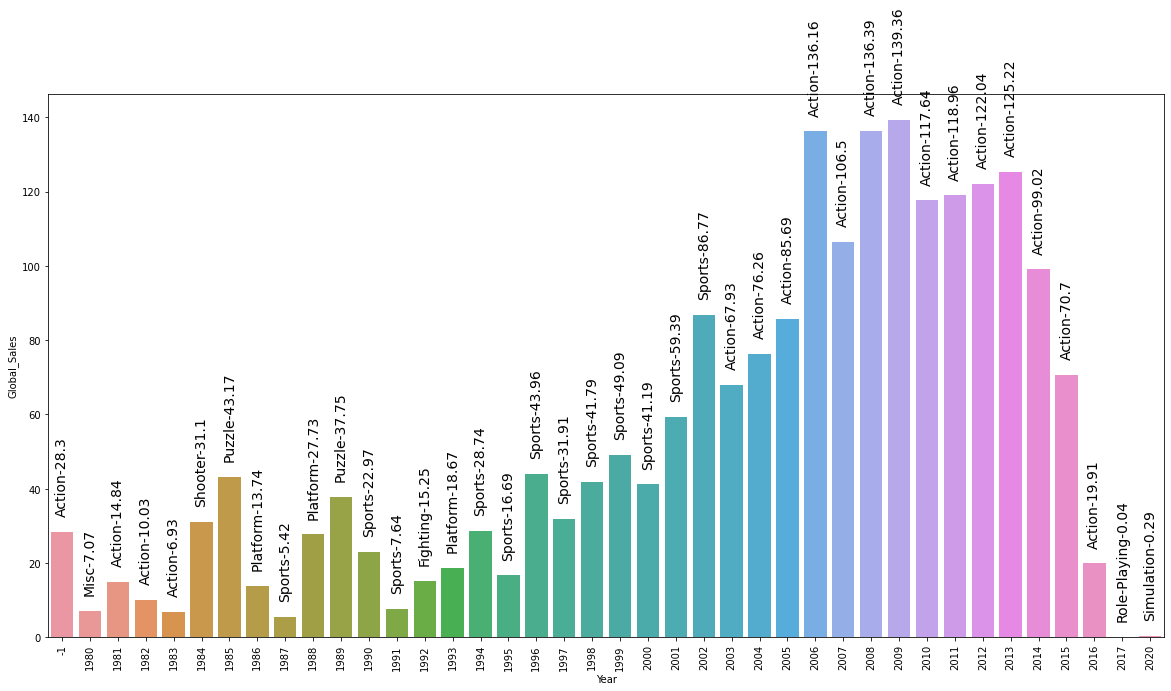

In [124]:
plt.figure(figsize=(20,10))
genre_graph_bar = sns.barplot(x="Year", y="Global_Sales", data=sales_year_max)
index = 0
for i in sales_year_max['Global_Sales'].values:
  genre_graph_bar.text(index, i+5, str(genre[index] + '-' + str(i)), color='#000', size=14, rotation=90, ha="center")
  index +=1

plt.xticks(rotation=90)
plt.show()

#### Receita Total (Sales_Global) por "País"

In [125]:
top_sales_by_countrys = df[['NA_Sales', "EU_Sales", "JP_Sales", "Other_Sales"]]

In [126]:
top_sales_by_countrys.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.49,29.02,3.77,8.46
1,29.08,3.58,6.81,0.77
2,15.85,12.88,3.79,3.31
3,15.75,11.01,3.28,2.96
4,11.27,8.89,10.22,1.00


In [127]:
top_sales_by_countrys = top_sales_by_countrys.sum().reset_index()

In [128]:
top_sales_by_countrys.head()

,index,0
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


In [129]:
top_sales_by_countrys = top_sales_by_countrys.rename(columns={"index":"Country", 0:"Sum of Sales"})

In [130]:
top_sales_by_countrys.head()

,Country,Sum of Sales
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


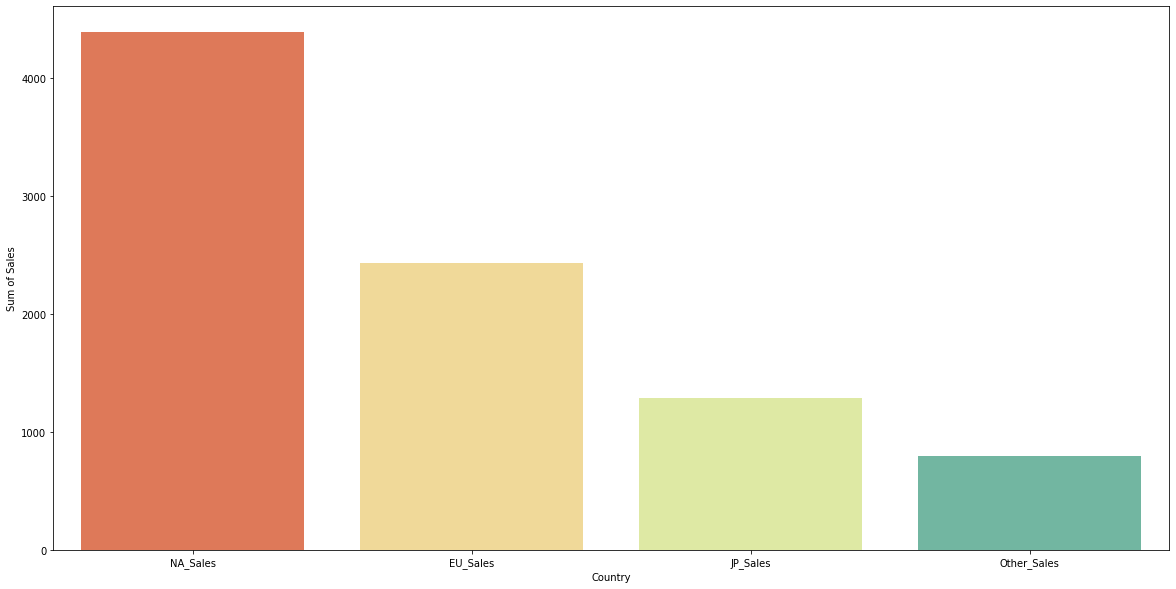

In [131]:
plt.figure(figsize=(20,10))
sns.barplot(x="Country", y="Sum of Sales", data=top_sales_by_countrys, palette="Spectral")


In [132]:
label = top_sales_by_countrys["Country"]

In [133]:
label

0       NA_Sales
1       EU_Sales
2       JP_Sales
3    Other_Sales
Name: Country, dtype: object

In [134]:
sum_of_sales = top_sales_by_countrys["Sum of Sales"]

In [135]:
sum_of_sales

0    4392.95
1    2434.13
2    1291.02
3     797.75
Name: Sum of Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x7f3ca0e1db90>,
 [Text(-1.0997117266962277, 0.025181703016309925, 'NA_Sales'),
  Text(0.7981571088480199, -0.7569314563389279, 'EU_Sales'),
  Text(0.935642530069744, 0.5784229040457237, 'JP_Sales'),
  Text(0.3051488492741687, 1.0568274124882695, 'Other_Sales')],
 [Text(-0.5998427600161241, 0.013735474372532685, '49.3%'),
  Text(0.4353584230080108, -0.412871703457597, '27.3%'),
  Text(0.510350470947133, 0.3155034022067583, '14.5%'),
  Text(0.16644482687681925, 0.5764513159026924, '8.9%')])

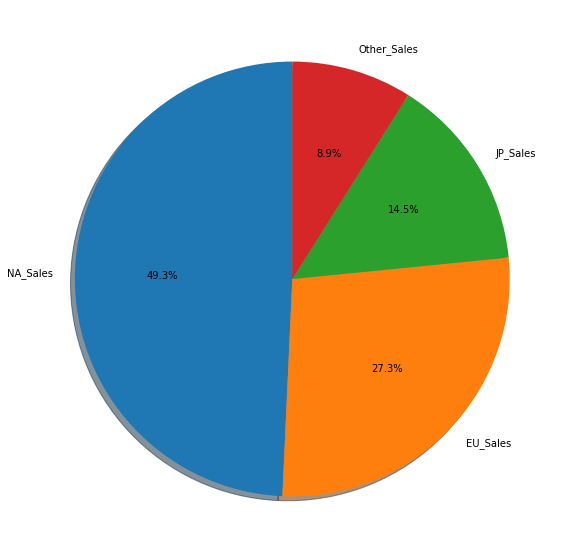

In [136]:
plt.figure(figsize=(20,10))
plt.pie(sum_of_sales,labels=label,autopct='%1.1f%%', shadow=True, startangle=90)

#### Histograma de Vendas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

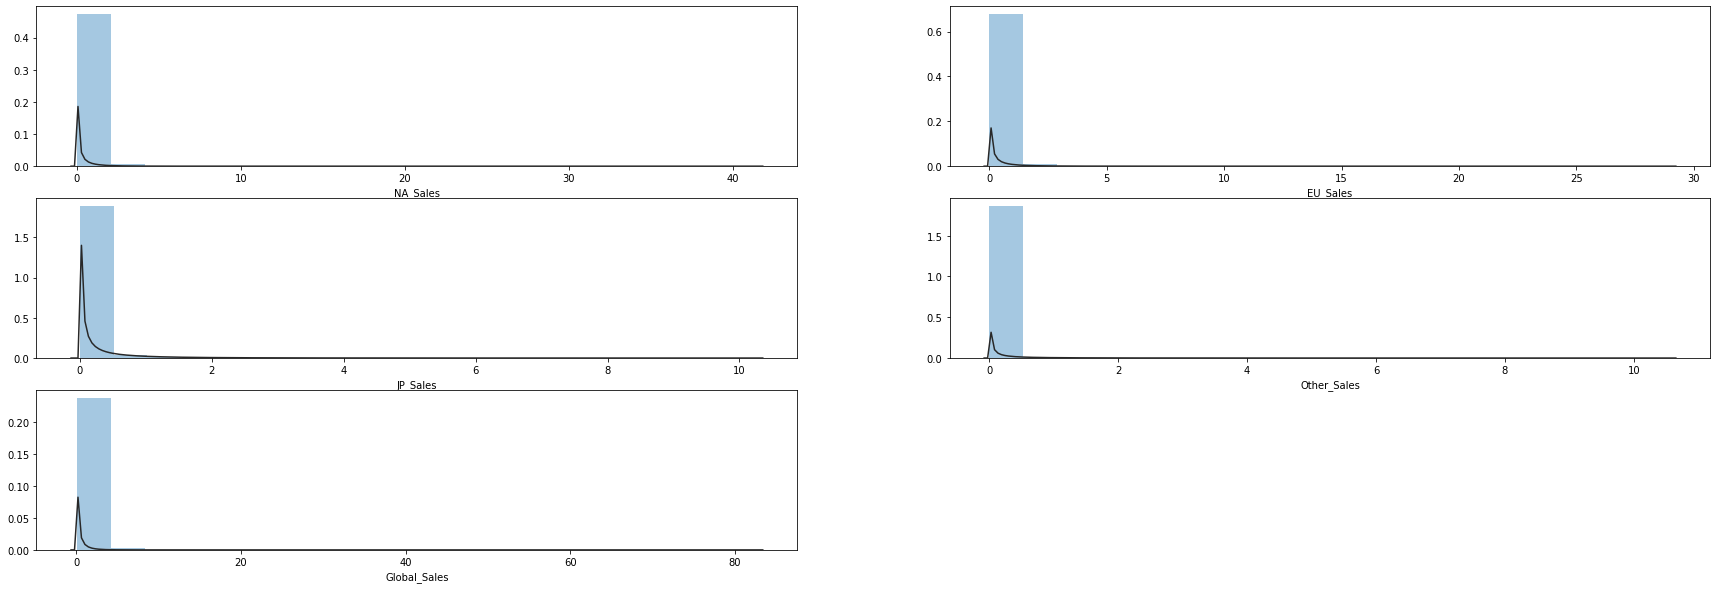

In [137]:
plt.figure(figsize=(30,10))
columns_country = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
for i, j in enumerate(columns_country):
  plt.subplot(3,2,i+1)
  sns.distplot(df[j], bins=20, kde=False, fit=stats.gamma)

In [140]:
df_hist_transform_log = df.copy()

In [141]:
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.NA_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.EU_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.JP_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.Other_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.Global_Sales != 0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

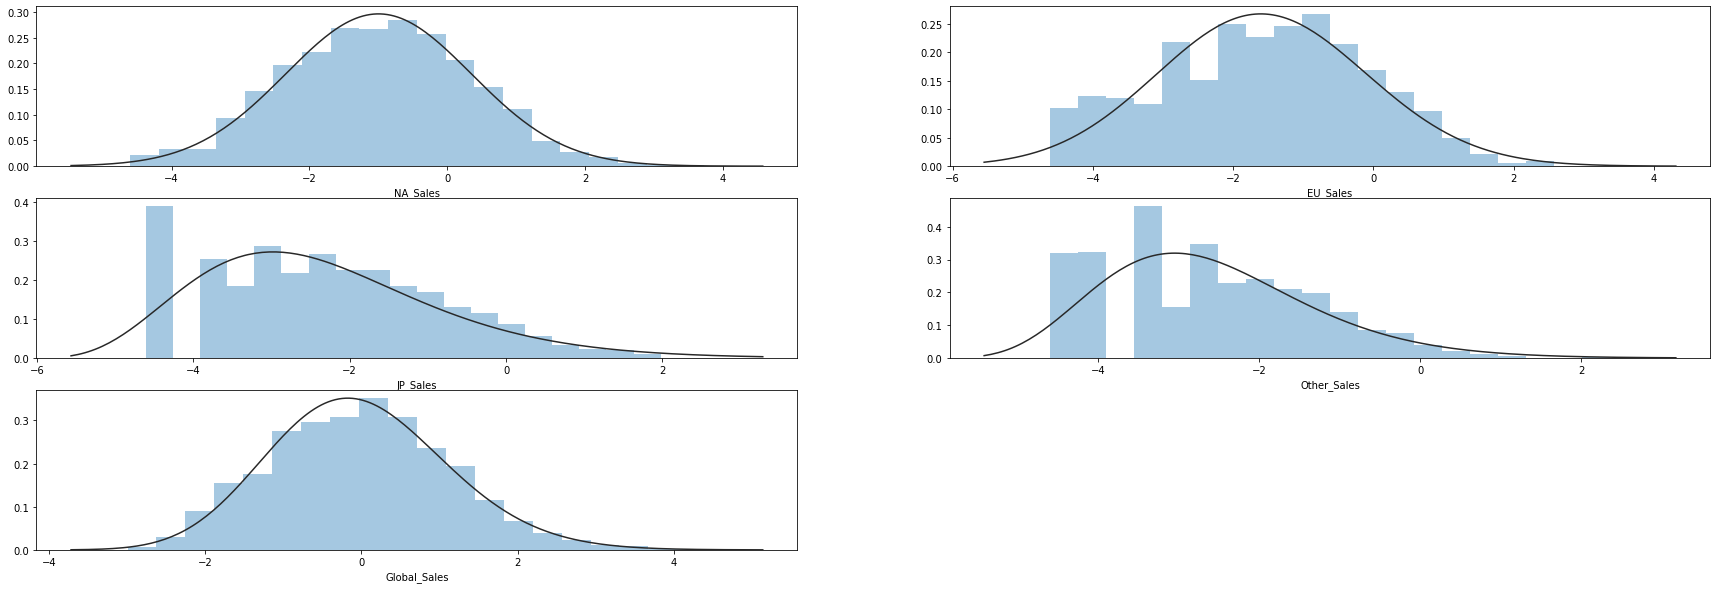

In [142]:
plt.figure(figsize=(30,10))
columns_country = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
for i, j in enumerate(columns_country):
  plt.subplot(3,2,i+1)
  sns.distplot(np.log(df_hist_transform_log[j]), bins=20, kde=False, fit=stats.gamma)

#### Correlação entre as features

In [138]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.008500,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,-0.008500,1.000000,0.005031,0.013993,0.018223,0.011731,0.012232
NA_Sales,-0.401362,0.005031,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.013993,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,0.018223,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.011731,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,0.012232,0.941047,0.902836,0.611816,0.748331,1.000000


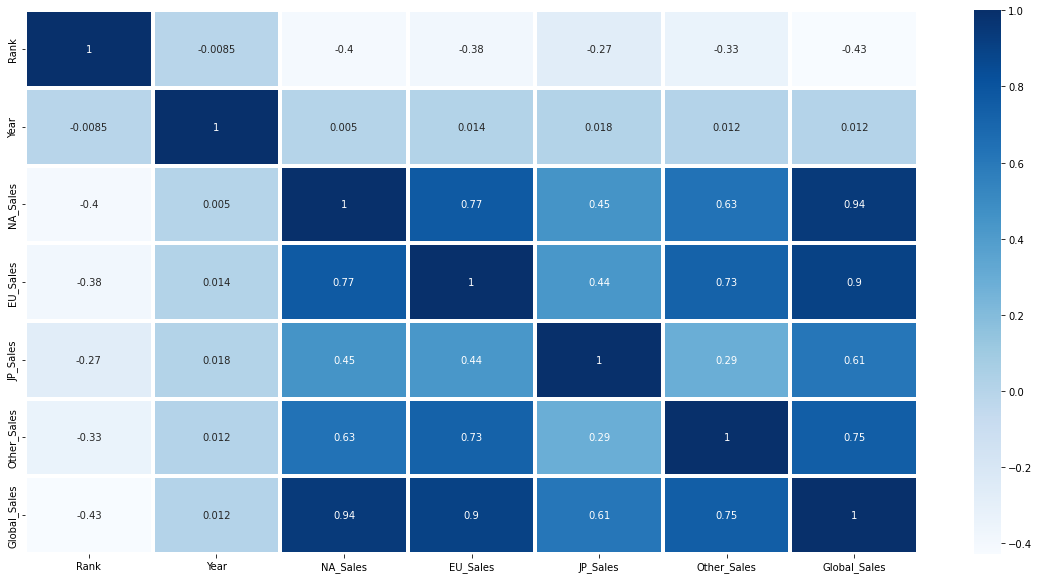

In [139]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, linewidth=3)

In [143]:
df_pair = df.loc[:,["Year", "Platform", "Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]

In [144]:
df_pair.head()

,Year,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,3.77,8.46
1,1985,NES,Platform,29.08,3.58,6.81,0.77
2,2008,Wii,Racing,15.85,12.88,3.79,3.31
3,2009,Wii,Sports,15.75,11.01,3.28,2.96
4,1996,GB,Role-Playing,11.27,8.89,10.22,1.00


<Figure size 1440x720 with 0 Axes>

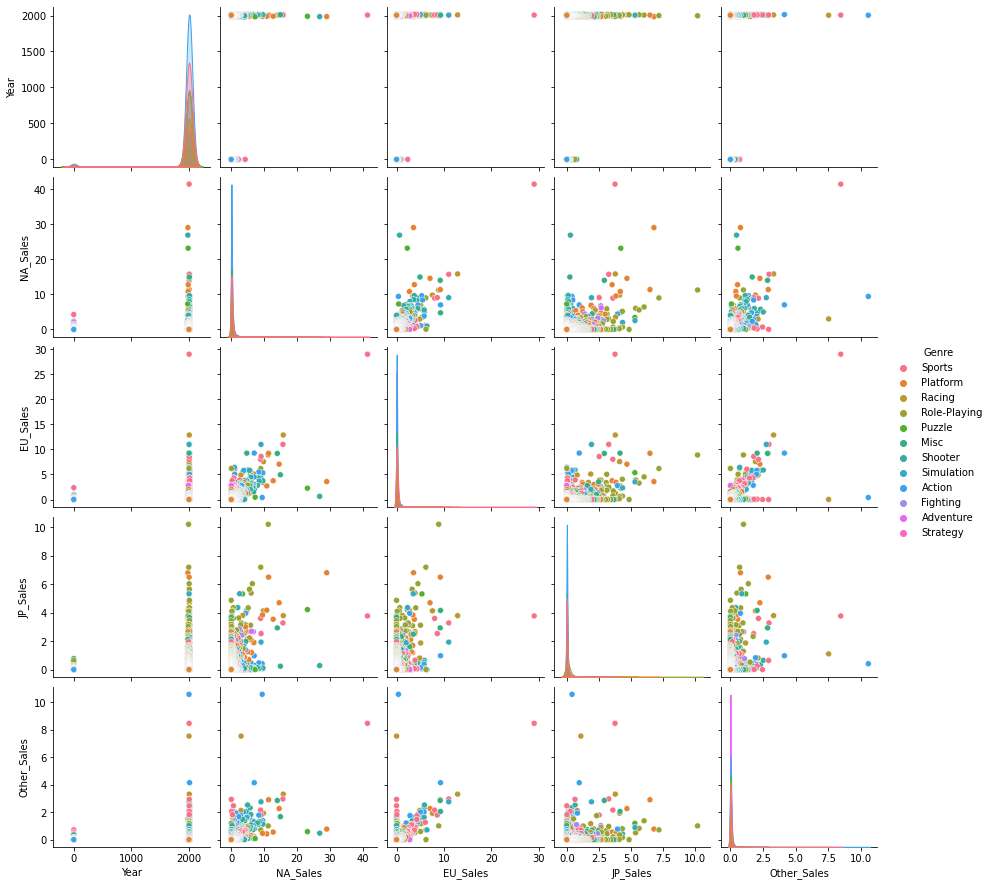

In [145]:
plt.figure(figsize=(20,10))
sns.pairplot(df_pair, hue="Genre")
plt.show()

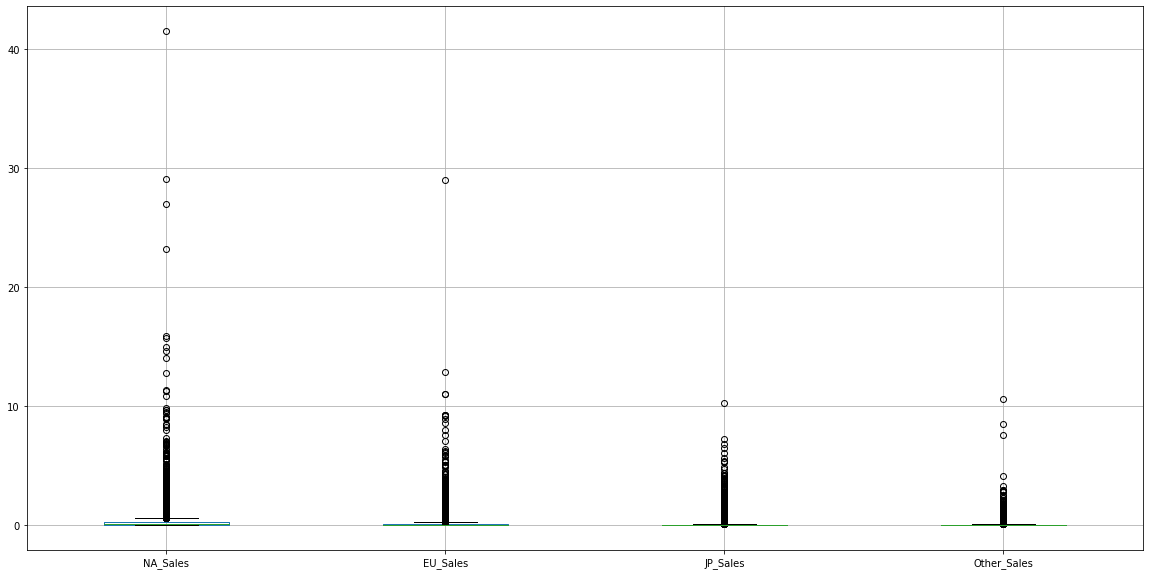

In [148]:
plt.figure(figsize=(20, 10))
df.boxplot(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.show()